[ 1.20997175e+02 -8.04173626e-05]
[1.20991718e+02 2.85620949e-04]
[1.20993285e+02 2.64149338e-04]
[1.21011227e+02 2.66032020e-05]
[1.20996223e+02 1.63359023e-04]
[1.20991744e+02 1.95157895e-04]
[1.20947315e+02 4.02246753e-04]
[ 1.21055713e+02 -5.92164912e-05]
9.650117691870378e-05
[120.99717543428575, 120.99604959120876, 120.99543080434786, 121.00200008616606, 121.00252972787453, 121.01335985073163, 121.01322216551716, 121.01399365837433, 121.01304935435614, 121.02840510253951, 121.02999515789472, 121.0337031578947, 121.03339610389605, 121.04184328571425, 121.04185646421067, 121.04073135087728]


<function matplotlib.pyplot.show(close=None, block=None)>

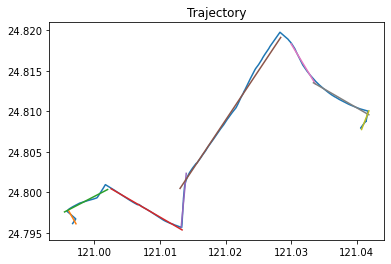

In [31]:

import gpxpy
import gpxpy.gpx
import numpy as np
import matplotlib.pyplot as plt

def drawCurve(tstart, tend, ai, bi):
    tt = range(tstart, tend)
    x = np.zeros(len(tt))
    y = np.zeros(len(tt))
    i = 0
    for t in range(tstart, tend):
        x[i] = ai[2]*t*t + ai[1]*t + ai[0]
        y[i] = bi[2]*t*t + bi[1]*t + bi[0]
        i = i + 1
    return x, y
def CalError(x,y,idx, idx_prev,w,z):
    error_X=float(0)
    error_Y=float(0)
    for i in range(idx_prev-1,idx):
        error_X += ((w[0]+w[1]*i)-x[i])*((w[0]+w[1]*i)-x[i])
        error_Y += ((z[0]+z[1]*i)-y[i])*((z[0]+z[1]*i)-y[i])
    return (error_X+error_Y)

def CutSegments(x,y,idx_prev, idx, threshold,segment):
    segment = set(segment)
    initial_vec=[x[idx_prev]-x[idx_prev-1],y[idx_prev]-y[idx-1]]
    for i in range(idx_prev-1, idx):
        now_x = x[i]
        next_x = x[i + 1]
        vec_x = next_x-now_x
        now_y = y[i]
        next_y = y[i + 1]
        vec_y = next_y-now_y
        if ((abs(vec_x-initial_vec[0])+abs(vec_y-initial_vec[1])) > threshold):
            segment.add(i)
            initial_vec=[next_x-now_x,next_y-now_y]
    segment = list(segment)
    segment.sort()
    return segment

#------------------------------------------

gpx_file = open('route.gpx', 'r', encoding="utf-8")
gpx = gpxpy.parse(gpx_file)

x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)

plt.plot(x, y)
    
# We will break the trajectory into segments by hand here
seg_idx = [1, 14, 36, 76, 104, 197, 215, 235, 253]
            
# we need to solve a least square problem.
#  Aw = X and Az = Y
xp = []
yp = []
# since t is 1, 2, ...., so we can use it as indices.
idx_prev = seg_idx[0]
error=float(0)
for idx in seg_idx[1:]:
    n = idx - idx_prev + 1
    A = np.ones((n, 2))
    A[:, 1] = np.array(range(idx_prev-1, idx))
    w = np.linalg.lstsq(A, x[idx_prev-1:idx], rcond=100)[0]
    z = np.linalg.lstsq(A, y[idx_prev-1:idx], rcond=100)[0]
    print(w)
    xp.append(w[0]+w[1]*(idx_prev-1))
    xp.append(w[0]+w[1]*idx)
    yp.append(z[0]+z[1]*(idx_prev-1))
    yp.append(z[0]+z[1]*idx)
    temp_error=CalError(x,y,idx, idx_prev,w,z)
    if temp_error>error:
        error=temp_error
    idx_prev = idx

print(error)
print(xp)
n = len(xp)
for i in range(0, n, 2):
    plt.plot(xp[i:i+2], yp[i:i+2])
plt.title("Trajectory") # title
plt.show

0.0005


error= 1.9715093102803587e-07


<function matplotlib.pyplot.show(close=None, block=None)>

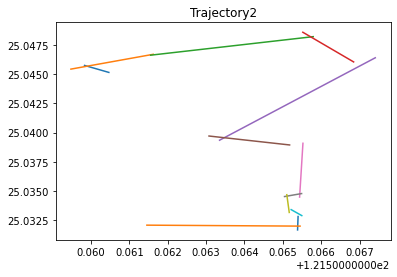

In [154]:
#1. plot my own route
gpx_file = open('route2.gpx', 'r', encoding="utf-8")
gpx = gpxpy.parse(gpx_file)

x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)

#plt.plot(x, y)
plt.show
# We will break the trajectory into segments by hand here
seg_idx = [1, 5, 30, 36, 50, 100, 120,135,144,155,163, 167, 180]
# we need to solve a least square problem.
#  Aw = X and Az = Y
xp = []
yp = []
# since t is 1, 2, ...., so we can use it as indices.
idx_prev = seg_idx[0]
error= float(0)
for idx in seg_idx[1:]:
    n = idx - idx_prev + 1
    A = np.ones((n, 2))
    A[:, 1] = np.array(range(idx_prev-1, idx))
    w = np.linalg.lstsq(A, x[idx_prev-1:idx], rcond=None)[0]
    z = np.linalg.lstsq(A, y[idx_prev-1:idx], rcond=None)[0]
    xp.append(w[0]+w[1]*(idx_prev-1))
    xp.append(w[0]+w[1]*idx)
    yp.append(z[0]+z[1]*(idx_prev-1))
    yp.append(z[0]+z[1]*idx)
    idx_prev = idx
    temp_error= CalError(x,y,idx,idx_prev,w,z)
    if temp_error>error:
        error = temp_error

print("error=",error)
n = len(xp)
for i in range(0, n, 2):
    plt.plot(xp[i:i+2], yp[i:i+2])
plt.title("Trajectory2") # title
plt.show

In [132]:
# 3. use my own algorithm to plot the route
def run(error_bound, filename):
    _error_bound = error_bound


    gpx_file = open(filename, 'r', encoding="utf-8")
    gpx = gpxpy.parse(gpx_file)

    x = []
    y = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                x.append(point.longitude)
                y.append(point.latitude)

    plt.plot(x, y)
    x_corner = []
    y_corner = [] 
    now_x = next_x = 0
    now_y = next_y = 0
    dir = 0 # right
    # print(len(x))
    # print(len(y))
    initial_vec=[x[1]-x[0],y[1]-y[0]]
    pre_value = 0
    for i in range(2,len(x) - 1):
        now_x = x[i]
        next_x = x[i + 1]
        vec_x = next_x-now_x
        now_y = y[i]
        next_y = y[i + 1]
        vec_y = next_y-now_y
        if ((abs(vec_x-initial_vec[0])+abs(vec_y-initial_vec[1])) > 0.001):
            x_corner.append(i)
            y_corner.append(i)
            initial_vec=[next_x-now_x,next_y-now_y]
        pre_value += abs(vec_x-initial_vec[0])+abs(vec_y-initial_vec[1])


    total_range = len(x)
    init_idx = [1, total_range]
    #print(x_corner, "\n", y_corner)
    for i in range(len(x_corner)):
        init_idx.append(x_corner[i])
    for j in range(len(y_corner)):
        init_idx.append(y_corner[j])
    # init_idx.sort()
    seg_idx = init_idx
    seg_idx = list(set(seg_idx)) 
    seg_idx.sort()
    print(seg_idx)

    #  Aw = X and Az = Y
    xp = []
    yp = []
    # since t is 1, 2, ...., so we can use it as indices.
    idx_prev = seg_idx[0]
    print(len(seg_idx[1:]))
    headx=x[0]
    heady=y[0]
    minx=0.0
    miny=0.0
    error = float(1)
    i = 1
    
    thresold = 0.01
    while i != len(seg_idx):
        idx = seg_idx[i]
        n = idx - seg_idx[i-1] + 1
        A = np.ones((n, 2))
        A[:, 1] = np.array(range(seg_idx[i-1]-1, idx))

        w = np.linalg.lstsq(A, x[seg_idx[i-1]-1:idx], rcond=None)[0]
        z = np.linalg.lstsq(A, y[seg_idx[i-1]-1:idx], rcond=None)[0]
        
        error = float(CalError(x,y,idx,seg_idx[i-1],w,z))

        j = i-1
        
        while error > error_bound:
            thresold -= 0.0001
            if  j+2 == len(seg_idx):
                print("this error bound is not possible")
                break
            if i == 1:
                break   
            seg_idx = CutSegments(x, y, seg_idx[j], seg_idx[j+1], thresold, seg_idx)
            

            n = seg_idx[j+1] - seg_idx[j] + 1
            A = np.ones((n, 2))
            A[:, 1] = np.array(range(seg_idx[j]-1,seg_idx[j+1]))

            w2 = np.linalg.lstsq(A, x[(seg_idx[j]-1):(seg_idx[j+1])], rcond=None)[0]
            z2 = np.linalg.lstsq(A, y[(seg_idx[j]-1):(seg_idx[j+1])], rcond=None)[0]

            error = CalError( x, y, seg_idx[j+1], seg_idx[j], w2, z2)


        idx = seg_idx[i]
        n = idx - seg_idx[i-1] + 1
        A = np.ones((n, 2))
        A[:, 1] = np.array(range(seg_idx[i-1]-1, idx))
        w3 = np.linalg.lstsq(A, x[seg_idx[i-1]-1:idx], rcond=None)[0]
        z3 = np.linalg.lstsq(A, y[seg_idx[i-1]-1:idx], rcond=None)[0]

        x_p=w3[0]+w3[1]*(idx_prev-1)
        xp.append(x_p)
        xp.append(w3[0]+w3[1]*idx)

        y_p=z3[0]+z3[1]*(idx_prev-1)
        yp.append(y_p)
        yp.append(z3[0]+z3[1]*idx)
        idx_prev = idx
        i += 1

        





        idx_prev = idx
    
    n = len(xp)
    for i in range(0, n, 2):
        plt.plot(xp[i:i+2], yp[i:i+2])
    print("error_bound=",error_bound)
    print(seg_idx)
    plt.title("Trajectory_v4") # title
    plt.show
    plt.savefig("Trajectory_v4.png")

[1, 42, 44, 61, 62, 82, 83, 93, 94, 174, 175, 184, 189, 191, 193, 201, 202, 239, 241, 249, 250, 253]
21
error_bound= 0.0001
[1, 42, 44, 61, 62, 82, 83, 93, 94, 174, 175, 184, 189, 191, 193, 201, 202, 239, 241, 249, 250, 253]


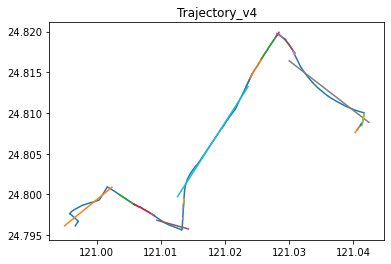

In [137]:
run(1e-4,'route.gpx')

In [74]:
# 3. another algorithm higher compression rate but more accurate
def run2(error_bound, filename):
    thresold = 0.001


    gpx_file = open(filename, 'r', encoding="utf-8")
    gpx = gpxpy.parse(gpx_file)

    x = []
    y = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                x.append(point.longitude)
                y.append(point.latitude)

    plt.plot(x, y)
    error = 1
    
    while error > error_bound:
        x_corner = []
        y_corner = [] 
        now_x = next_x = 0
        now_y = next_y = 0
        dir = 0 # right
        # print(len(x))
        # print(len(y))
        initial_vec=[x[1]-x[0],y[1]-y[0]]
        pre_value = 0
        for i in range(2,len(x) - 1):
            now_x = x[i]
            next_x = x[i + 1]
            vec_x = next_x-now_x
            now_y = y[i]
            next_y = y[i + 1]
            vec_y = next_y-now_y
            if ((abs(vec_x-initial_vec[0])+abs(vec_y-initial_vec[1])) > thresold):
                x_corner.append(i)
                y_corner.append(i)
                initial_vec=[next_x-now_x,next_y-now_y]
            pre_value += abs(vec_x-initial_vec[0])+abs(vec_y-initial_vec[1])


        total_range = len(x)
        init_idx = [1, total_range]
        #print(x_corner, "\n", y_corner)
        for i in range(len(x_corner)):
            init_idx.append(x_corner[i])
        for j in range(len(y_corner)):
            init_idx.append(y_corner[j])
        # init_idx.sort()
        seg_idx = init_idx
        seg_idx = list(set(seg_idx)) 
        seg_idx.sort()
        xp = []
        yp = []
        # since t is 1, 2, ...., so we can use it as indices.
        idx_prev = seg_idx[0]
        error = float(0)
        head = [x[0],y[0]]
        for idx in seg_idx:
            n = idx - idx_prev + 1
            A = np.ones((n, 2))
            A[:, 1] = np.array(range(idx_prev-1, idx))
            w = np.linalg.lstsq(A, x[idx_prev-1:idx], rcond=None)[0]
            z = np.linalg.lstsq(A, y[idx_prev-1:idx], rcond=None)[0]
            x_p=w[0]+w[1]*(idx_prev-1)
            xp.append(head[0])
            xp.append(w[0]+w[1]*idx)
            head[0]
            y_p=z[0]+z[1]*(idx_prev-1)
            yp.append(head[1])
            yp.append(z[0]+z[1]*idx)
            temp_error = float(CalError(x,y,idx,idx_prev,w,z))
            if temp_error > error:
                error = temp_error
            idx_prev = idx
            head=[w[0]+w[1]*idx,z[0]+z[1]*idx]
        thresold -= 0.00001
    
    n = len(xp)
    for i in range(0, n, 2):
        plt.plot(xp[i:i+2], yp[i:i+2])
    print("error_bound=",error)
    print("break points=", len(xp)/2)

    plt.title("Trajectory_v4") # title
    plt.show
    plt.savefig("Trajectory_v4.png")

error_bound= 6.101399999990219e-07
break points= 148.0


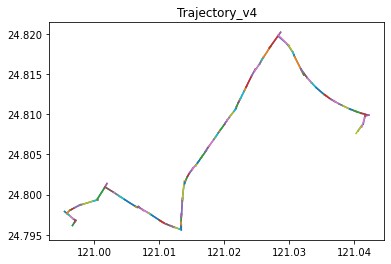

In [77]:
run2(1e-6,"route.gpx")

14 -14
23 -23
41 -41
29 -29
94 -94
19 -19
21 -21
19 -19
1.7253950733200711
break points 9


<function matplotlib.pyplot.show(close=None, block=None)>

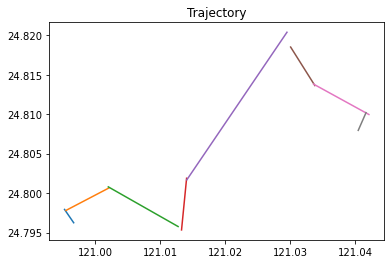

In [37]:
#4. using quadratic curve x=atˆ2+bt+c
gpx_file = open('route.gpx', 'r', encoding="utf-8")
gpx = gpxpy.parse(gpx_file)

x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)

#plt.plot(x, y)
    
# We will break the trajectory into segments by hand here
seg_idx = [1, 14, 36, 76, 104, 197, 215, 235, 253]
            
# we need to solve a least square problem.
#  Aw = X and Az = Y
xp = []
yp = []
# since t is 1, 2, ...., so we can use it as indices.
idx_prev = seg_idx[0]
error = float(0)
for idx in seg_idx[1:]:
    n = idx - idx_prev + 1
    A = np.ones((n, 3))
    A[:, 1] = np.array(range(idx_prev-1, idx))
    for i in range(0,n):
        
        A[i,2]=A[i,1]*A[i,1]
    print(len(A),(idx_prev-1-idx))
    #print(A)
    w = np.linalg.lstsq(A, x[idx_prev-1:idx], rcond=None)[0]
    z = np.linalg.lstsq(A, y[idx_prev-1:idx], rcond=None)[0]
    #print(1,w)
    xp.append(w[0]+w[1]*(idx_prev-1)+w[2]*(idx_prev-1)*(idx_prev-1))
    xp.append(w[0]+w[1]*idx+w[2]*idx*idx)
    yp.append(z[0]+z[1]*(idx_prev-1)+z[2]*(idx_prev-1)*(idx_prev-1))
    yp.append(z[0]+z[1]*idx+z[2]*idx*idx)
    temp_error=CalError(x,y,idx,idx_prev,w,z)
    if temp_error>error:
        error=temp_error
    
    idx_prev = idx

print(error)
n = len(xp)
#print(xp,yp)
print("break points", len(seg_idx))
for i in range(0, n, 2):
    plt.plot(xp[i:i+2], yp[i:i+2])
plt.title("Trajectory") # title
plt.show

5 -5
26 -26
7 -7
15 -15
51 -51
21 -21
16 -16
10 -10
12 -12
9 -9
5 -5
14 -14
3.577897238293509
break points 13


<function matplotlib.pyplot.show(close=None, block=None)>

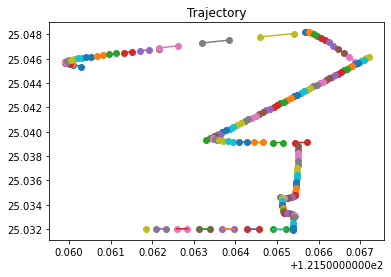

In [38]:
#using drawCurve function:
gpx_file = open('route2.gpx', 'r', encoding="utf-8")
gpx = gpxpy.parse(gpx_file)

x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)

#plt.plot(x, y)
    
# We will break the trajectory into segments by hand here
seg_idx = [1, 5, 30, 36, 50, 100, 120,135,144,155,163, 167, 180]
            
# we need to solve a least square problem.
#  Aw = X and Az = Y
xp = np.array
yp = np.array
# since t is 1, 2, ...., so we can use it as indices.
idx_prev = seg_idx[0]
error = float(0)
for idx in seg_idx[1:]:
    n = idx - idx_prev + 1
    A = np.ones((n, 3))
    A[:, 1] = np.array(range(idx_prev-1, idx))
    for i in range(0,n):
        
        A[i,2]=A[i,1]*A[i,1]
    print(len(A),(idx_prev-1-idx))
    #print(A)
    w = np.linalg.lstsq(A, x[idx_prev-1:idx], rcond=None)[0]
    z = np.linalg.lstsq(A, y[idx_prev-1:idx], rcond=None)[0]
    #print(1,w)
    xp=np.array(drawCurve(idx_prev,idx,w,z)[0])

    yp=np.array(drawCurve(idx_prev,idx,w,z)[1])
    for i in range(0, n, 2):
        plt.plot(xp[i:i+2], yp[i:i+2],marker='o')
    
    temp_error=CalError(x,y,idx,idx_prev,w,z)
    if temp_error>error:
        error=temp_error
    
    idx_prev = idx

print(error)
n = len(xp)
#print(xp,yp)
print("break points", len(seg_idx))
for i in range(0, n, 2):
    plt.plot(xp[i:i+2], yp[i:i+2])
plt.title("Trajectory") # title
plt.show

In [8]:
#5. Use Total least sqaures
def tls(X,y):
    
    if X.ndim == 1: 
        n = 1 # the number of variable of X
        X = X.reshape(len(X),1)
    else:
        n = np.array(X).shape[1] 

    Q = np.vstack((X.T,y)).T

    U, s, Vt = np.linalg.svd(X, full_matrices=True)
    Ut=U.T

    n = len(y)
    y = np.array(y)
    np.reshape(y, (n,1))
    c = Ut.dot(y.T)
    
    z1=c[0]/s[0]
    z2=c[1]/s[1]
    Z=[z1,z2]

    Z=np.array(Z)
    Z=Z.T

    V = Vt.T
    W=V.dot(Z)
    return W

[ 1.21181096e+02 -2.03471703e-03  6.49725275e-06]
[ 1.21181096e+02 -2.03471703e-03  6.49725275e-06]
[ 1.21181096e+02 -2.03471703e-03  6.49725275e-06]
[ 1.21181096e+02 -2.03471703e-03  6.49725275e-06]
[ 1.21181096e+02 -2.03471703e-03  6.49725275e-06]
[ 1.21181096e+02 -2.03471703e-03  6.49725275e-06]
[ 1.21181096e+02 -2.03471703e-03  6.49725275e-06]
[ 1.21181096e+02 -2.03471703e-03  6.49725275e-06]
[120.99717543428572, 120.99604959120882, 120.99543080434783, 121.00200008616609, 121.00252972787456, 121.01335985073163, 121.01322216551715, 121.01399365837437, 121.01304935435616, 121.0284051025395, 121.02999515789473, 121.03370315789473, 121.03339610389598, 121.04184328571422, 121.04185646421065, 121.0407313508773]
error= 3.7175656462970493e-06
16


<function matplotlib.pyplot.show(close=None, block=None)>

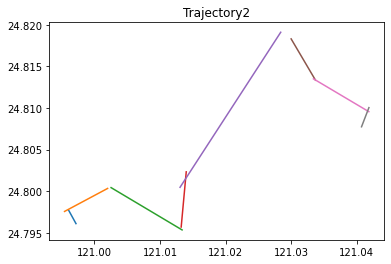

In [149]:
###########using route.gpx##############
gpx_file = open('route.gpx', 'r', encoding="utf-8")
gpx = gpxpy.parse(gpx_file)

x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)


seg_idx = [1, 14, 36, 76, 104, 197, 215, 235, 253]

##########using route2.gpx##############
#gpx_file = open('route2.gpx', 'r', encoding="utf-8")
#gpx = gpxpy.parse(gpx_file)
#
#x = []
#y = []
#for track in gpx.tracks:
#    for segment in track.segments:
#        for point in segment.points:
#            x.append(point.longitude)
#            y.append(point.latitude)
#
#
#plt.show
#
#seg_idx = [1, 5, 30, 36, 50, 100, 120,135,144,155,163, 167, 180]
xp = []
yp = []

idx_prev = seg_idx[0]
error=float(0)
for idx in seg_idx[1:]:
    n = idx - idx_prev + 1
    A = np.ones((n, 2))
    A[:, 1] = np.array(range(idx_prev-1, idx))

    w_TLS=tls(A, x[idx_prev-1:idx])
    z_TLS=tls(A, y[idx_prev-1:idx])
    print(w)
    xp.append(w_TLS[0]+w_TLS[1]*(idx_prev-1))
    xp.append(w_TLS[0]+w_TLS[1]*idx)
    yp.append(z_TLS[0]+z_TLS[1]*(idx_prev-1))
    yp.append(z_TLS[0]+z_TLS[1]*idx)
    idx_prev = idx
    temp_error= CalError(x,y,idx,idx_prev,w_TLS,z_TLS)
    if temp_error>error:
        error = temp_error

print(xp)
print("error=",error)
n = len(xp)
print(n)
for i in range(0, n, 2):
    plt.plot(xp[i:i+2], yp[i:i+2])

plt.title("Trajectory2") # title
plt.show
#[120.99717543428575, 120.99604959120876, 120.99543080434786, 121.00200008616606, 121.00252972787453, 
# 121.01335985073163, 121.01322216551716, 121.01399365837433, 121.01304935435614, 121.02840510253951, 
# 121.02999515789472, 121.0337031578947, 121.03339610389605, 121.04184328571425, 121.04185646421067, 121.04073135087728]
